# Question 1

In computer vision, image zooming is a process that enlarges or reduces an
image while preserving or altering its details.
You are provided with an image, einstein.jpg, and your task is to apply
zooming with a factor of 2 using the following two methods: Pixel
replication and Zero-order hold.

## A) Describe each of the two methods (Pixel replication, Zero-order hold) for image zooming.
## B) Implement Python code to perform zooming in on the image 'einstein.jpg' using a zoom factor of 2 for each of the two methods. Provide step-by-step explanations of your code for each method.

Original shape: (182, 189)
Zoomed shape: (364, 378)


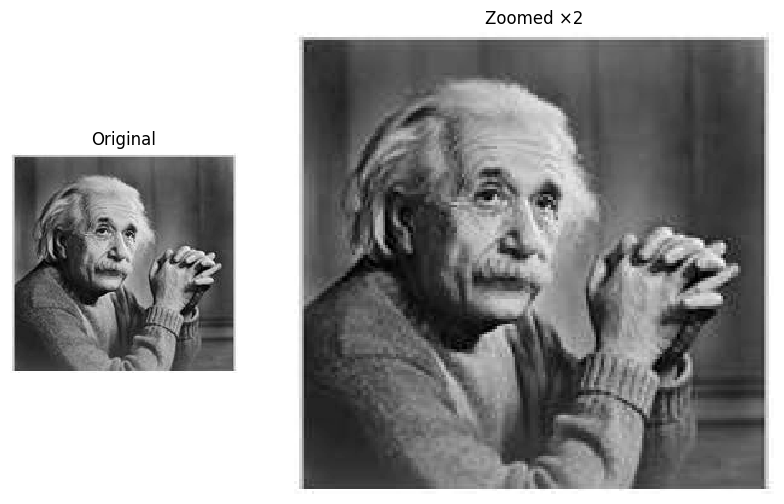

In [16]:
import cv2
import matplotlib.pyplot as plt

# --- Read the image in grayscale ---
img = cv2.imread('./Required Files/einstein.jpg', cv2.IMREAD_GRAYSCALE)

# --- Zoom the image using zero-order hold (nearest neighbor) ---
zoom_factor = 2
zoomed = cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_NEAREST)

# --- Print the shapes to verify the zoom ---
print("Original shape:", img.shape)
print("Zoomed shape:", zoomed.shape)

# --- Create a figure for subplots with a specific size ---
fig = plt.figure(figsize=(10, 6))  # Width=10 inches, Height=6 inches

# --- Create subplots with different widths to emphasize zoom difference ---
ax1 = plt.subplot2grid((1, 3), (0, 0))           # First subplot at row 0, column 0
ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2) # Second subplot at row 0, column 1, spanning 2 columns

# --- Display the original image ---
ax1.imshow(img, cmap='gray', interpolation='none') # Show image without interpolation
ax1.set_title('Original')                           # Set title
ax1.axis('off')                                     # Remove axes for cleaner look

# --- Display the zoomed image ---
ax2.imshow(zoomed, cmap='gray', interpolation='none') # Show zoomed image without interpolation
ax2.set_title(f'Zoomed ×{zoom_factor}')               # Set title
ax2.axis('off')                                       # Remove axes

# --- Show the figure with both subplots ---
plt.show()

## C) For each of the two methods, discuss their advantages and disadvantages.Consider aspects such as image quality, computational complexity, and suitability for different types of images.

### Advantages
- Simple to implement
- Very fast

### Disadvanteges
- No smoothing or interpolation
- Poor quality for large zoom factors

## D) Display the zoomed images for the two methods and report the results.Examine the effects of increasing the zoom factor (e.g., from 2 to 4) on image quality and detail preservation.

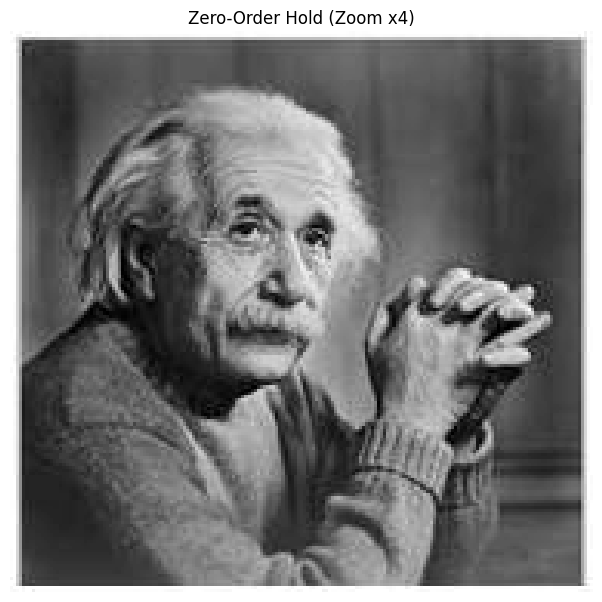

(728, 756)


In [17]:
zoom_factor = 4
zoomed_4x = cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_NEAREST)
# --- Get image dimensions ---
height, width = zoomed_4x.shape

# figsize in inches = pixels / dpi
dpi = 100
figsize = (width / dpi, height / dpi)  # width and height in inches

plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(zoomed_4x, cmap='gray', interpolation='none')  # no interpolation
plt.title(f'Zero-Order Hold (Zoom x{zoom_factor})')
plt.axis('off')  # hide axes to see real pixel size
plt.show()
print(zoomed_4x.shape)


## E) Suggest an improved zooming method and compare its results with the two experimented methods.

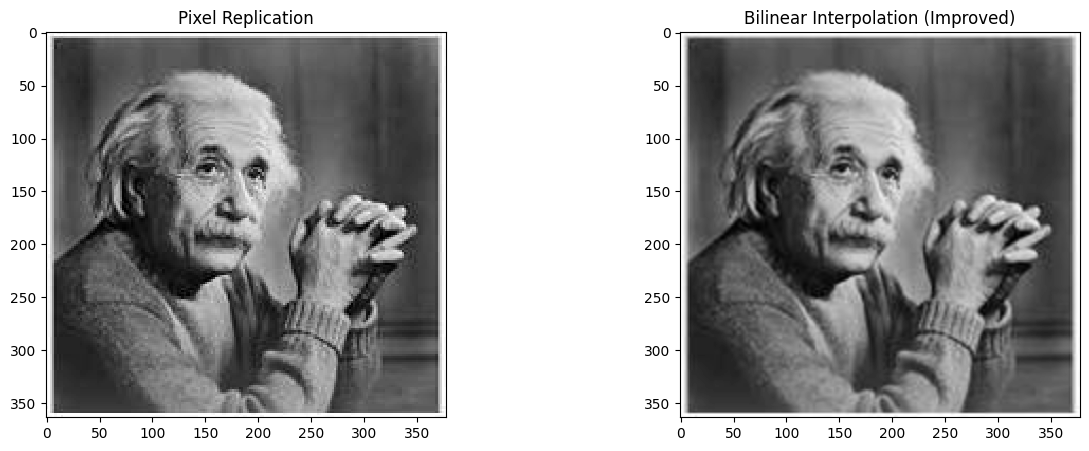

In [18]:
zoom_factor = 2

# --- Bilinear interpolation zoom (smoother and improved quality) ---
# cv2.resize with INTER_LINEAR computes a weighted average of neighboring pixels
zoomed_bilinear = cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)

# --- Create a figure with 3 subplots side by side ---
plt.figure(figsize=(15, 5))  # Width=15 inches, Height=5 inches

# --- First subplot: Pixel replication / Zero-Order Hold
plt.subplot(1, 2, 1)
plt.title('Pixel Replication')
plt.imshow(zoomed, cmap='gray', interpolation='none')

# --- Third subplot: Bilinear interpolation ---
plt.subplot(1, 2, 2)
plt.title('Bilinear Interpolation (Improved)')
plt.imshow(zoomed_bilinear, cmap='gray', interpolation='none')

# --- Display all subplots ---
plt.show()

# Question 2
You are given a low-contrast grayscale image, 'low_contrast.jpg', which has
lost significant details due to insufficient contrast. Your task is to enhance the
image using logarithmic and gamma correction techniques. Additionally, you
need to plot the histograms of the original and enhanced images for
comparison

## A) Normalize the image to ensure its pixel values are within range (0 to 1).

In [19]:
import numpy as np

img2 = cv2.imread('./Required Files/low_contrast.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

# --- Normalize pixel values to range [0,1]
Xmin = img2.min()
Xmax = img2.max()
diff = Xmax - Xmin
img_normalized = (img2.astype(np.float32) - Xmin) / diff

# --- Optional: check min/max ---
print(f"Min pixel value: {img_normalized.min()}")
print(f"Max pixel value: {img_normalized.max()}")

Min pixel value: 0.0
Max pixel value: 1.0


## B) Describe each of the two methods (Logarithmic correction and Gamma correction) for contrast stretching.

### 1. **Logarithmic Correction**

* Formula:

  `s = c . log(1 + r)`
  
  where:

  * `r` = normalized pixel value (0–1)
  * `c` = scaling constant
  * `s` = enhanced pixel value

### 2. **Gamma Correction**

* Formula:
  `s = r^γ`

  where:

  * (`γ` < 1) → brighten image
  * (`γ` > 1) → darken image

## C) Apply logarithmic contrast stretching to 'low_contrast.jpg' using the formula

In [20]:
c = 1.0 / np.log(1 + img_normalized.max())  # scale to [0,1]

img_log = c * np.log(1 + img_normalized)
img_log = np.clip(img_log * 255, 0, 255)

# Optional: check min/max
print("Log-enhanced min/max:", img_log.min(), img_log.max())

Log-enhanced min/max: 0.0 255.0


## D) Apply gamma correction to 'low_contrast.jpg'. Choose a suitable 'gamma' value for enhancing the image's contrast.

In [21]:
# --- Gamma correction ---
gamma_l = 0.7  # gamma < 1
img_gammaL = np.power(img_normalized, gamma_l)
img_gammaL = np.clip(img_gammaL * 255, 0, 255)

gamma_g = 1.4 # gamma > 1
img_gammaG = np.power(img_normalized, gamma_g)
img_gammaG = np.clip(img_gammaG * 255, 0, 255)  # keep values in [0,1]

# Optional: check min/max
print("GammaL-enhanced min/max:", img_gammaL.min(), img_gammaL.max())
print("GammaG-enhanced min/max:", img_gammaG.min(), img_gammaG.max())


GammaL-enhanced min/max: 0.0 255.0
GammaG-enhanced min/max: 0.0 255.0


## E) After applying both contrast enhancement techniques, plot histograms for the original and enhanced images on a single figure.

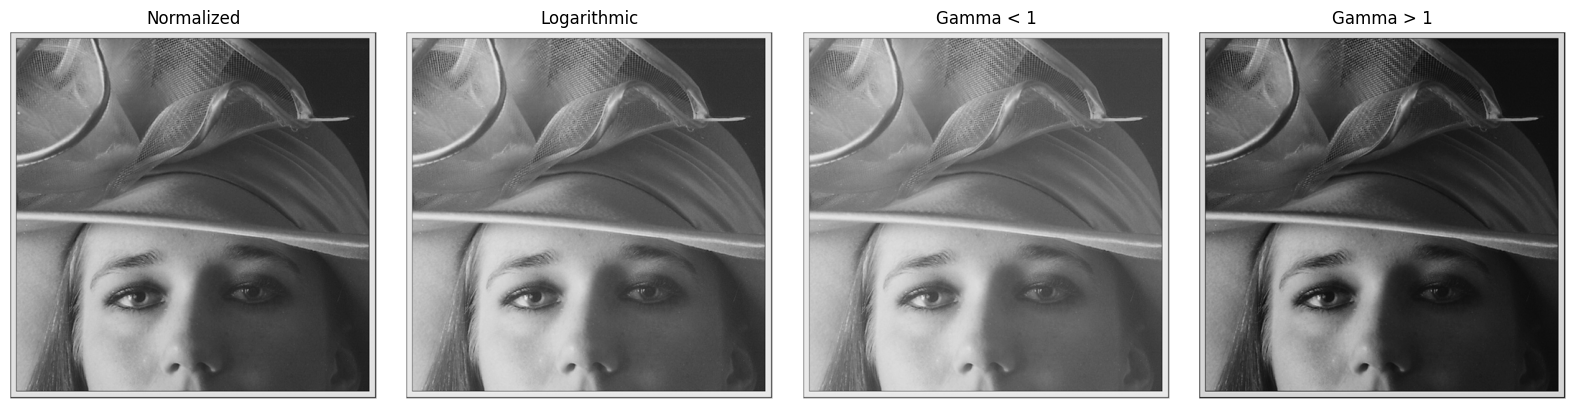

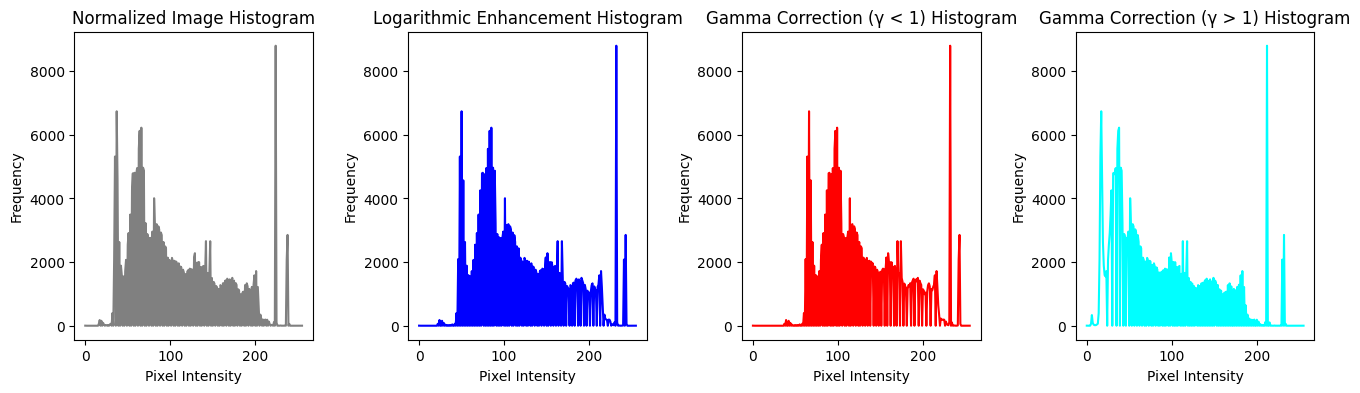

In [22]:
# --- Display all images in a single figure with subplots ---
plt.figure(figsize=(16,4))



# Original image
plt.subplot(1,4,1)
plt.imshow(img_normalized, cmap='gray')
plt.title('Normalized')
plt.axis('off')

# Logarithmic enhancement
plt.subplot(1,4,2)
plt.imshow(img_log, cmap='gray', vmin=0, vmax=255)
plt.title('Logarithmic')
plt.axis('off')

# Gamma < 1
plt.subplot(1,4,3)
plt.imshow(img_gammaL, cmap='gray', vmin=0, vmax=255)
plt.title('Gamma < 1')
plt.axis('off')

# Gamma > 1
plt.subplot(1,4,4)
plt.imshow(img_gammaG, cmap='gray', vmin=0, vmax=255)
plt.title('Gamma > 1')
plt.axis('off')

plt.tight_layout()
plt.show()


# --- Plot histograms separately ---

hist_normalized = cv2.calcHist([(img_normalized * 255).astype(np.uint8)], [0], None, [256], [0,256])
hist_logarithmic = cv2.calcHist([img_log], [0], None, [256], [0,256])
hist_gammaL = cv2.calcHist([img_gammaL.astype(np.uint8)], [0], None, [256], [0,256])
hist_gammaG = cv2.calcHist([img_gammaG.astype(np.uint8)], [0], None, [256], [0,256])


plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.plot(hist_normalized, color='gray')
plt.title('Normalized Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.subplot(1,4,2)
plt.plot(hist_logarithmic, color='blue')
plt.title('Logarithmic Enhancement Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.subplot(1,4,3)
plt.plot(hist_gammaL, color="red")
plt.title('Gamma Correction (γ < 1) Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.subplot(1,4,4)
plt.plot(hist_gammaG, color="cyan")
plt.title('Gamma Correction (γ > 1) Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace= 0.4, hspace=0.5)
plt.show()



# Question 3

Histogram equalization is a technique widely used in image processing to enhance the contrast of an image by redistributing the intensity values. In this question, you will explore the concept of histogram equalization step by step.


## A) Normalize picture
## B) Calculate and plot the histogram

img3 normalized min = 0.0
img3 normalized max = 1.0


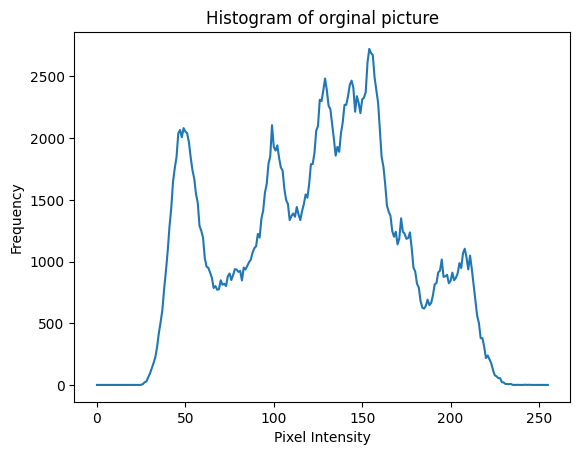

In [23]:
img3 = cv2.imread("./Required Files/lena_gray.gif", cv2.IMREAD_GRAYSCALE)

Xmax = img3.max()
Xmin = img3.min()
diff = Xmax - Xmin
img3_normalized = (img3.astype(np.float32) - Xmin) / diff
print(f"img3 normalized min = {img3_normalized.min()}")
print(f"img3 normalized max = {img3_normalized.max()}")

img3_hist = cv2.calcHist([img3], [0], None, [256], [0,256])

plt.plot(img3_hist)
plt.title("Histogram of orginal picture")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

## C) Implement the histogram equalization algorithm on the original image then calculate and plot the histogram of the equalized image.

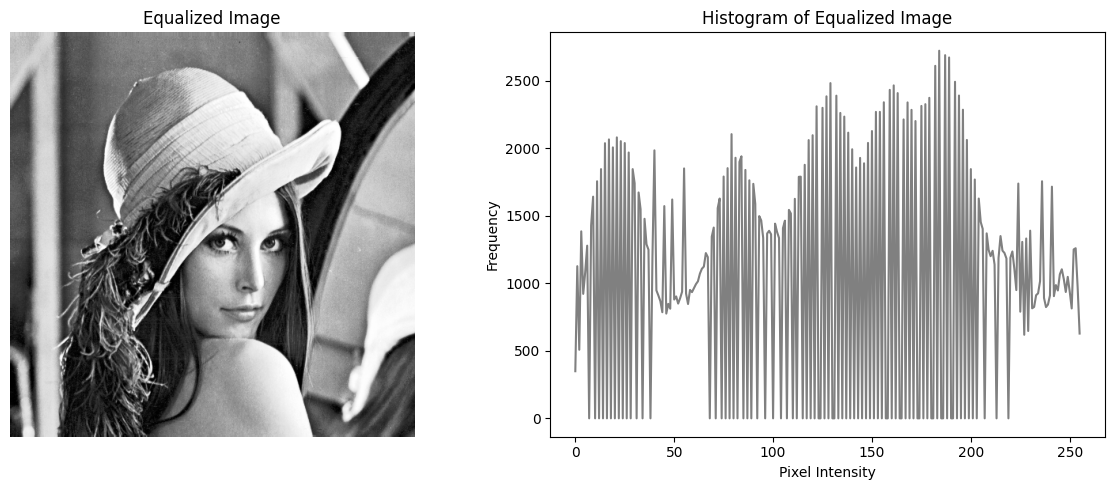

In [24]:
import cv2
import matplotlib.pyplot as plt

# --- Equalization ---
img3_equalizeHist = cv2.equalizeHist(img3)
img3_HEH = cv2.calcHist([img3_equalizeHist], [0], None, [256], [0, 256])

# --- Display ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img3_equalizeHist, cmap='gray', vmin=0, vmax=255)
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.plot(img3_HEH, color='gray')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## D) Display the original image, the histogram-equalized image, and their respective histograms side by side for comparison.

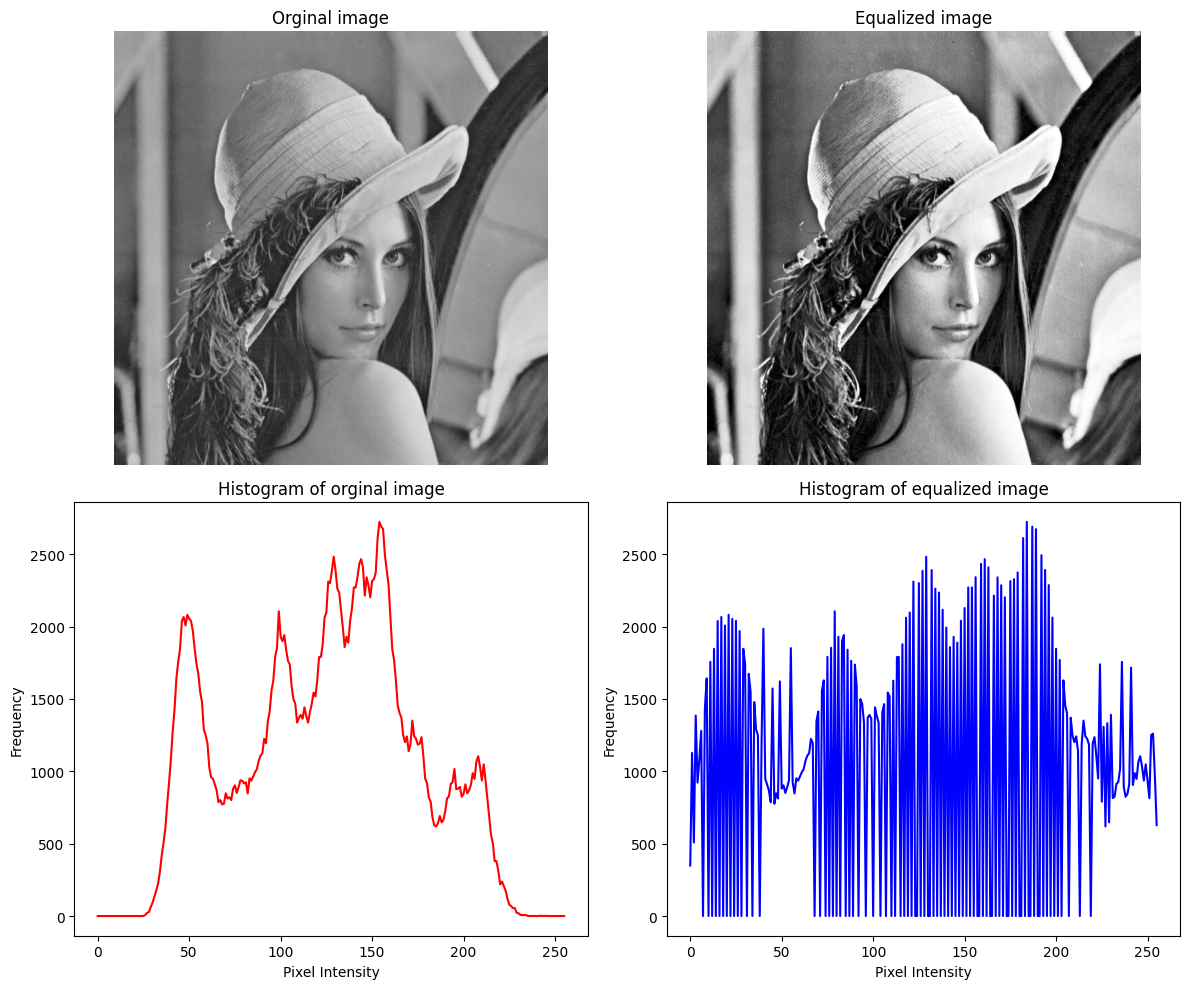

In [25]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("Orginal image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img3_equalizeHist, cmap='gray', vmin=0, vmax=255)
plt.title("Equalized image")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.plot(img3_hist, color='red')
plt.title("Histogram of orginal image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.plot(img3_HEH, color='blue')
plt.title("Histogram of equalized image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Question 4

The image square.gif contains two square objects. Pixels in the first square have the intensity of 150, while those in the second square have the intensity of 220. Read the image and do the following:

## A) The small square is to be translated by 40 pixels in both directions.

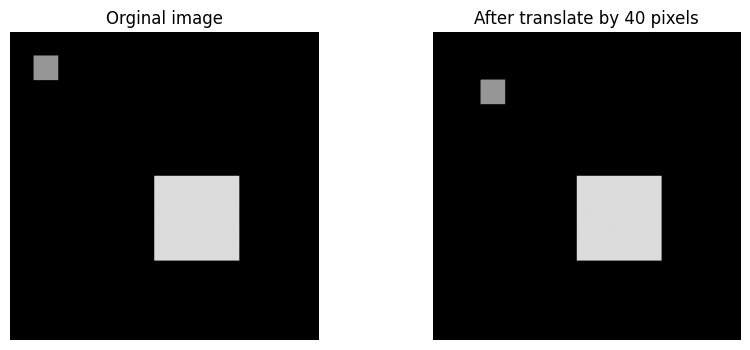

In [29]:
import copy
img4 = cv2.imread("./Required Files/square.gif", cv2.IMREAD_GRAYSCALE)
img4_t40 = copy.copy(img4)
for i in range(img4.shape[0]):
    for j in range(img4.shape[1]):
        if img4[i][j] == 150:
            img4_t40[i+40][j+40] = 150
            img4_t40[i][j] = 0

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.title("Orginal image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img4_t40, cmap='gray', vmin=0, vmax=255)
plt.title("After translate by 40 pixels")
plt.axis("off")

plt.show()


## B) The large square is to be rotated by 60 degrees counter clockwise.

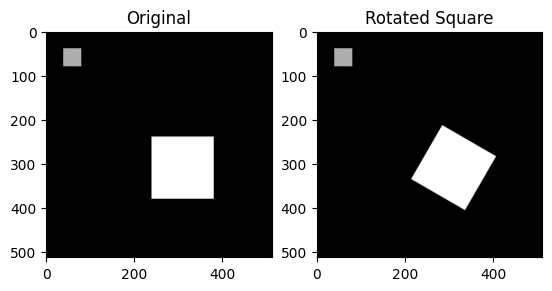

In [27]:
x, y, size = 239, 239, 141

square = img4[x: x + size, y: y + size]

pad = 40
square_padded = cv2.copyMakeBorder(square, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)


(h, w) = square_padded.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 60, 1.0)
rot_square = cv2.warpAffine(square_padded, M, (w, h))


rotated_img = img4.copy()
rotated_img[x: x+size, y: y+size] = img4[0][0]


cx, cy = x + size // 2, y + size // 2
x1 = cx - w // 2
y1 = cy - h // 2

y_min = max(y1, 0)
x_min = max(x1, 0)
y_max = min(y1 + h, img4.shape[0])
x_max = min(x1 + w, img4.shape[1])

roi_y1 = y_min - y1
roi_x1 = x_min - x1
roi_y2 = roi_y1 + (y_max - y_min)
roi_x2 = roi_x1 + (x_max - x_min)

mask = rot_square[roi_y1:roi_y2, roi_x1:roi_x2] > 0
rotated_img[y_min:y_max, x_min:x_max][mask] = rot_square[roi_y1:roi_y2, roi_x1:roi_x2][mask]

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img4, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Rotated Square")
plt.imshow(rotated_img, cmap='gray')
plt.show()

# Question 5

For the image skeleton.gif, try to modify the normalized image using the following functions:

- `g(x,y) = e ^ c*f(x,y)`
- `g(x,y) = c*log10[f(x,y) + 1]`
- `g(x,y) = f(x,y) if f(x,y) < 0.1 else 2*f(x,y)`

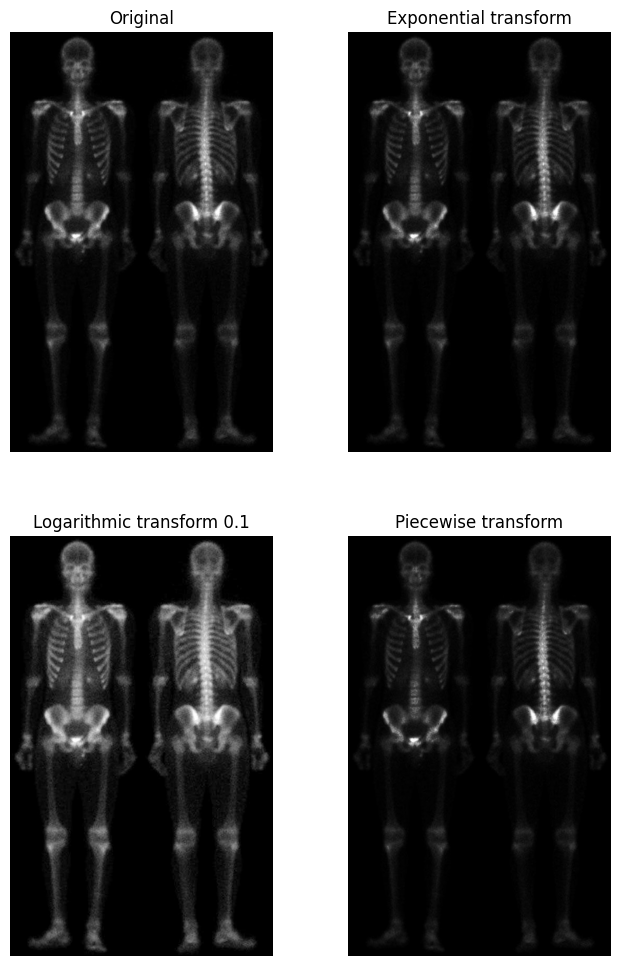

In [28]:
import cv2
import numpy as np

img5 = cv2.imread('./Required Files/skeleton.gif', cv2.IMREAD_GRAYSCALE)
Xmin = img2.min()
diff = img2.max() - Xmin
img5_normalized = (img5.astype(np.float32) - Xmin) / diff

# --- 1) Exponential transform: g(x,y) = e^(c * f(x,y))
c = 0.5
img5_ex = np.exp(c * img5_normalized)

# --- 2) Logarithmic transform: g(x,y) = c * log10(f(x,y) + 1)
c = 0.1
img5_log = c * np.log10(img5_normalized + 1)


# --- 3) Piecewise transform:
img5_pie = np.where(img5_normalized < 0.1, img5_normalized, 2 * img5_normalized)

# --- Display all
plt.figure(figsize=(8,12))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(img5, cmap='gray')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Exponential transform")
plt.imshow(img5_ex, cmap='gray')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Logarithmic transform 0.1")
plt.imshow(img5_log, cmap='gray')
plt.axis("off")


plt.subplot(2, 2, 4)
plt.title("Piecewise transform")
plt.imshow(img5_pie, cmap='gray')
plt.axis("off")

plt.show()